## Week 6. Neural Nets and backpropagation

In this session we will continue the work we started on neural networks. In particular, in this exercise, you will get to code a neural network from scratch and will be asked to understand and code backpropagation to train the network 

<img src="NNbrainIMage.png" alt="Drawing" style="width: 400px;"/>

image credit:  [https://appen.com](https://appen.com) 

__Exercise 1.__ Let us go back briefly to a simple dataset to make sure we understand how things work. As a first exercise, we will code a one hidden layer neural network that outputs a binary 0/1 variable indicating the class of our data. Throughout this exercise, we will use the notation $z^{\ell+1} = \sigma(a^{\ell+1})$ to denote the output of any neuron from the $(\ell+1)^{th}$ layer and where $a^{\ell+1} = \sum_{k} w_{\ell+1,k} z_k$ is the combination from the previous layer that is fed to the neuron.  


<img src="SingleHiddenLayerNeuralNet.png" alt="Drawing" style="width: 400px;"/>

image credit:  [MaviccPRP@web.studio](https://maviccprp.github.io) 

We will use the function ['minimize'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) from scipy. Check the documentation of that function. We will set the 'jac' parameter of the optimizer to 'True', which implies that the (objective) function that we provide as an input should return both the value of the loss and the value of its gradient. 

For this first exercise, you are asked to write a function $f(W)$ wich takes as arguments a vector $W$ containing all the parameters of your network (as a first step consider building a network with only a few hidden units, in order to make sure the model is working). As indicated above, the function should return (1) the value of the binary cross entropy for the given set of weights and (2) the value of the gradient derived through Backpropagation (as we set the value of 'jac' to True). 

 We will split the writing of your function into several steps. Once you have coded each step, you should gather them together in a single $fun(W)$ body that you will then pass as input to the minimize function. 

__Exercise 1.a.__ Start by loading the data using the lines below and plot it using scatter( )

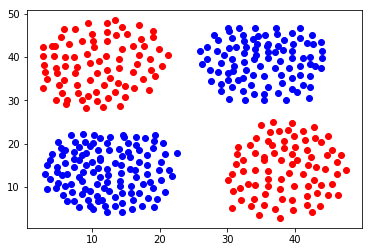

In [1]:
from scipy.optimize import minimize



import scipy.io as sio
data1 = sio.loadmat('pointsClass1Week6.mat')
data2 = sio.loadmat('pointsClass2Week6.mat')

import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as LA


data1 = data1['pointsClass1Week6']
data2 = data2['pointsClass2Week6']

data = np.vstack((data1, data2))

Xtilde = np.hstack((np.ones((np.shape(data)[0],1)), data))


# # put your code here

target1 = np.ones((np.shape(data1)[0], 1))
target2 = 0*np.ones((np.shape(data2)[0], 1))

target = np.vstack((target1, target2))

c = Xtilde[0,:]
target = target[0]


plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.show()


__Exercise 1.b__ As indicated above, we want to apply the network to the simple binary dataset that you loaded above. We want to build an architecture similar to the one shown above, except that, since we only consider a 2D dataset, we only need 2 inputs. we want our activation function to be all sigmoid. Start by defining the function sigmoid and the gradient of this function. Once you are done, check your derivative. Also make sure you can compute the entrywise sigmoid on any numpy array if the input to your function is a numpy array. 

In [48]:
# put the code here

import numpy as np

def sigmoid(x):
    
    '''Should return the sigmoid activation function at the vector x, sigma(x) = 1/1+e^{-x}
    and the derivative sigma'(x). The function should be able to handle a vector of values'''
    
    
    sigma = np.true_divide(1, 1+np.exp(-x))
    
    derivative_sigma = np.multiply(sigma, (1-sigma))  
    
    return sigma, derivative_sigma



network_size = [2,1]
input_dim = 2



# You must keep track of how you sort the weights in the weights vector


total_num_weights = 9

weights = np.random.normal(0, 1, (total_num_weights, 1))


weights = np.random.normal(0,0.1, (1, (input_dim+1)*network_size[0]))

for l in np.arange(len(network_size)-1):
    
    weights = np.hstack((weights, np.random.normal(0,0.1, (1, (network_size[l]+1)*network_size[l+1])) ))

    
    
W0 = np.zeros(( network_size[0], input_dim +1)) 


# print(unit)
# print(input_dim)
# print(unit*(input_dim+1))
# print((unit+1)*(input_dim+1))
weights = weights.reshape(-1,1)

#print(weights[unit*(input_dim+1):(unit+1)*(input_dim+1)])





# ================================================================================
# Part I: Forward propagation
# ================================================================================


total_number_units = np.sum(network_size)

activations = np.zeros((total_number_units, 1))
z = np.zeros((total_number_units, 1))
sigma_prime = np.zeros((total_number_units, 1))

# ================================================================================
# Part Ia. Forward propagation through First layer 
# ================================================================================

current_unit_iter = 0


for unit in np.arange(network_size[0]):
    
    W0[unit, :] = np.squeeze(weights[unit*(input_dim+1):(unit+1)*(input_dim+1)])
    
    

output_layer1 = np.dot(W0, Xtilde.T)

activations[0:len(output_layer1)] = output_layer1.reshape(-1,1)


sigmaLayer1, derivative_sigmaLayer1 = sigmoid(output_layer1)

z[0:len(output_layer1)] = sigmaLayer1.reshape(-1,1)

sigma_prime[0:len(output_layer1)] = derivative_sigmaLayer1.reshape(-1,1)

current_input = sigmaLayer1

current_unit_iter += len(output_layer1)


start = network_size[0]*(input_dim+1)



# current_input = np.vstack((np.ones((1, np.shape(current_input)[1])),current_input))

current_input = np.hstack((1, current_input))



# ================================================================================
# Part Ib. Forward propagation through subsequent layers
# ================================================================================

   
for hL in np.arange(len(network_size)-1)+1:
    
    
    W = np.zeros((network_size[hL], network_size[hL-1]+1))
    
    
    
    num_inputs = len(W.flatten())
    weights_tmp = weights[start:start+num_inputs+1]
    
    for unit in np.arange(network_size[hL]):
        
        W[unit,:] = np.squeeze(weights[unit*(input_dim+1):(unit+1)*(input_dim+1)])
    
    
    start += start+num_inputs+1
    
    
    activation = np.dot(W, current_input)
    
    activations[current_unit_iter:current_unit_iter+len(activation)] = activation
    
    sigma, derivative_sigma = sigmoid(activation)
    
    current_input = sigma
    
    z[current_unit_iter:current_unit_iter+len(activation)] = current_input
    sigma_prime[current_unit_iter:current_unit_iter+len(activation)] = derivative_sigma
    
    
output = current_input

# ==============================================================================
# Part I.c Computing the loss from output to the network 
# ==============================================================================


binary_crossEntropy = -(np.multiply(np.squeeze(target), np.log(np.squeeze(output))) \
+ np.multiply(np.squeeze(1-target), np.log(1-np.squeeze(output))))

#numPoints = len(binary_crossEntropy)
#binary_crossEntropy = np.sum(binary_crossEntropy)

delta_out = output - target
delta = np.zeros((total_number_units, 1))

# ================================================================================
# Part II. gradient Computation 
# ================================================================================

derivatives = np.zeros((len(weights), 1))


# ========================================================================================
# Part II.a  weights of the output layer
# ========================================================================================

l=len(network_size)-1

weights[-network_size[l]*(network_size[l-1]+1):]

ztilde = np.stack(1,z[-1-network_size[l-1]:-1] )
dL_dw  = ztilde*delta_out

derivatives[-network_size[l]*(network_size[l-1]+1):] = dL_dw


# ========================================================================================
# Part II.b  Backpropagate the delta
# ========================================================================================


weights_tmp = weights[-1-network_size[l]*(network_size[l-1]+1):-1]
weights_tmp = weights_tmp[1:]


da_ell_vs_da_ellMinus1 = np.multiply(weights_tmp.reshape(-1,1),sigma_prime[0:2].reshape(-1,1))

delta_ellMinus1 = da_ell_vs_da_ellMinus1*delta_out

DL_dw = np.multiply(Xtilde[1:].reshape(-1,1), (delta_ellMinus1.reshape(-1,1)).T)
print(DL_dw)


derivatives



# First column of DL_dw is derivative of loss with respect to w^{(1)} corresponding to unit 1
# Second column of DL_dw is derivative of loss with respect to w^{(1)} corresponding to unit 2

    
    
    
    #for units in np.arange(network_size[l]):
        
        

# #        
    

# def loss(X,t):
    
#      '''return the value of the loss for the sample pair (Xi, ti) and 
#      should compute the gradient through backprop'''
    

#     # Computation of binary cross entropy: just fill out with the above 
    
    
#     # gradient see part II above 
    
    
    
    
    
    
    
    
    
    
    
    
    
    
       
#     return loss, loss_gradient 


# # import scipy.optimize.minimize

# # res = minimize(fun=loss, w0, method='BFGS', jac=True, options={'maxiter': 250})

# # weights = res.x



[[-0.00090198 -0.10835868]
 [-0.00730644 -0.87775874]]


In [26]:
print(np.arange(2))

[0 1]


__Exercise 1.c__ Now that we have the sigmoid and its gradient, we will code the loss. As you might remember from previous labs, the MLPClassifier from scikit-learn optimizes the 'log-loss function' (a.k.a Binary cross entropy) which reads for a set of $N$ prototypes $x_i$ with binary $0/1$ targets, 

$$−\frac{1}{N}\sum_{i=1}^N (y_i \log(p_{W}(x_i))+(1−y_i)\log(1−p_{W}(x_i))) $$

Here the probability $p_{W}(x_i)$ is the output of your network. Instead of minimizing this function directly, we will consider its $\ell_2$ regularized version

$$−\frac{1}{N}\sum_{i=1}^N (y_i \log(p_{W}(x_i))+(1−y_i)\log(1−p_{W}(x_i)))  + \lambda \sum_{j\in\text{weights}\setminus \text{bias}} W^2_j$$

Where the $W_j$ encode the weights. Code that function for a given labeled dataset $X,t$ such as given above, a set of weights stored in the vector $W$ (you can use a list or a dictionnary if you want but ultimately, you will need to store them in a numpy vector for use with the optimization routine).  Note that one typically does not regularize the bias terms. 

In [ ]:
# put your code here





__Exercise 1.d. Towards Backpropagation.__ The example above is relatively simple so that backpropagation is not really needed. Compute the gradient of the Binary cross entropy loss with respect to the weights.  

In [ ]:
# put your code here



__Exercise 1.e.__ Combine all your previous steps into a single function and pass this function to the 'minimize' routine. To choose the initial value for the weights, a common heuristic is for the n^th layer to be initialized unformly at random in the interval $[-\varepsilon_n, \varepsilon_n]$ with $\epsilon_n$ defined as $\sqrt{\frac{2}{\text{size layer}_{\ell-1} + \text{size layer}_{\ell} }}$




In [ ]:
# put the body of your function here

import scipy.optimize.minimize

res = minimize(fun=backprop, w0, method='', jac=True, options={'maxiter': 250})

weights = res.x

__Bonus 1__ change the activation to the Relu and reapeat the steps above. How do you compute the gradient in this case?

__Exercise 2.__ Coding a One hidden layer neural network is good to warm up but to really understand backpropagation, we will not add a few hidden layers. Still relying on the code that you developed above and using backpropagation, train a depth 4 neural network with 10 neurons in each layer on the binary dataset. 

__Exercise 2a.__ In this exercise, because of the multiple layers of the network, you will get to really code backpropagation. To do this, follow the steps below 

(see [Bishop Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)) for more details.

- Take any of the sample (Once you have completed one step of backprop, you should re-apply it to the next sample to get the gradient contribution for that next sample and so on). Forward propagate that sample through the network and compute all the activations $z = \sigma(a_i)$ and input $a_i$ for each unit. 

- Evaluate the $\delta_k = y_k(x_n) - t_{n,k}$ for all the output units.

- Backpropagate the $\delta_k$ using the formula

$$\delta_j = \sigma'(a_j) \sum_{k} w_{k,j} \delta_k$$

- Finally, compute the derivatives as 

$$\frac{\partial \text{loss}}{\partial w_{ij}}  = \delta_j z_i$$

Note that when coding the backpropagation algorithm, you don't need to account for the regularization part of the loss as you can just add the gradient of the regularization to the result of the backpropagation algorithm.  


In [ ]:
from scipy.optimize import minimize


# put your code here


__Exercise 3.__ Extending to multiple classes. Load the data using the lines given below, visualize it with scatter. How can you extend the Binary cross entropy function to the multiclass problem?

In [ ]:

import scipy.io as sio
data1 = sio.loadmat('xWeek6Ex3PointsClass1.mat')
data2 = sio.loadmat('xWeek6Ex3PointsClass2.mat')
data3 = sio.loadmat('xWeek6Ex3PointsClass3.mat')

from numpy import linalg as LA

data1 = data1['xWeek6Ex3PointsClass1']
data2 = data2['xWeek6Ex3PointsClass2']
data3 = data3['xWeek6Ex3PointsClass3']


# put your code here

